# Ejercicio 1

In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mu_a = 1          #tiempo entre consultas al servicio (a)
mu_b = 2          #tiempo entre consultas al servicio (b)
mu_c = 4          #tiempo entre consultas al servicio (c)
p = 0.6           #probabilidad de ser atendido por base A
q = 1 - p         #probabilidad de ser atendido por base B
mu_1a = 0.7       #demora en responder una solicitud base A
mu_1b = 0.95      #demora en responder una solicitud base B
mu_2 = 0.8        #demora en responder una solicitud base unica
n = 100000        #cantidad de solicitudes procesadas
cant_simu = 100   #cantidad de simulaciones 

In [4]:
def tiempo_espera(t_arribo,t_demora):
    t_espera = [0]
    n = len(t_arribo)
    for i in range(1,n):
        # - espera actual = llegada actual - (llegada anterior + espera anterior + demora anterior)
        # espera actual = - llegada actual + (demora anterior + espera anterior + llegada anterior)
        t_espera_actual = - t_arribo[i] + t_arribo[i-1] + t_espera[i-1] +  t_demora[i - 1]
        if(t_espera_actual < 0):
            t_espera_actual = 0
        t_espera.append(t_espera_actual)
    return t_espera

In [5]:
def alternativa_1(mu,n,cant_simulaciones):
    t_medios_espera = []
    tasas_finalizacion = []
    fraccion_no_espera = []
    for i in range(cant_simulaciones):
      t_base_a=[]
      t_base_b=[]
      z = np.random.exponential(mu,n)                     # tiempos entre eventos del proceso de llegada
      t = np.concatenate(([0],np.cumsum(z)),axis=None)    # momentos donde llegan los eventos
      u = np.random.rand(n)
      for i in range(0,n):
          if (u[i] < p): 
              t_base_a.append(t[i])                     # responde la base a, momentos donde arriban los eventos a la base a
          else:
              t_base_b.append(t[i])                     # responde la base b, momentos donde arriban los eventos a la base a
      
      t_demora_base_a = np.random.exponential(mu_1a, len(t_base_a))       # tiempos de demora de la base a
      t_demora_base_b = np.random.exponential(mu_1b, len(t_base_b))       # tiempos de demora de la base b
      t_espera_base_a = tiempo_espera(t_base_a,t_demora_base_a)           # tiempos de espera de la base a
      t_espera_base_b = tiempo_espera(t_base_b,t_demora_base_b)           # tiempos de espera de la base b
      
      t_espera = np.concatenate((t_espera_base_a, t_espera_base_b))       # tiempos de espera de ambas bases
      t_demora = np.concatenate((t_demora_base_a, t_demora_base_b))       # tiempos de demora de ambas bases
      
      t_medio_espera = np.mean(t_espera)
      fracc_no_espera = (len(t_espera) - np.count_nonzero(t_espera))/len(t_espera)
      tasa_demora =  1 /np.mean(np.array(t_demora))
      tasa_espera =  1 /np.mean(np.array(t_espera))
      tasa_llegada = 1 /np.mean(np.array(z))
      tasa_finalizacion = tasa_demora + tasa_espera + tasa_llegada
      
      tasas_finalizacion.append(tasa_finalizacion)
      t_medios_espera.append(t_medio_espera)
      fraccion_no_espera.append(fracc_no_espera)

    print("alternativa 1 con {:d} simulaciones y mu: {:.2f}".format(cant_simulaciones,mu))
    print("tiempo medio de espera: {:.4f} seg".format(np.mean(t_medios_espera)))
    print("fraccion de solicitudes que no esperaron: {:.5f}".format(np.mean(fraccion_no_espera)))
    print("tasa de finalizacion de consultas: {:.7f} seg \n".format(np.mean(tasas_finalizacion)))

    return np.concatenate(([0],np.cumsum(t_espera)),axis=None)

In [6]:
def alternativa_2(mu,n,cant_simulaciones):
    t_medios_espera = []
    tasas_finalizacion = []
    fraccion_no_espera = []
    for i in range(cant_simulaciones):
      z = np.random.exponential(mu,n)                         # tiempos entre eventos del proceso de llegada
      t = np.concatenate(([0],np.cumsum(z)),axis=None)        # momentos donde llegan los eventos
      t_demora = np.random.exponential(mu_2, len(t))          # tiempos de demora de la base 
      t_espera = tiempo_espera(t,t_demora)                    # tiempos de espera de la base a
      t_medio_espera = np.mean(t_espera)
      fracc_no_espera = (len(t_espera) - np.count_nonzero(t_espera))/len(t_espera) 
      tasa_demora =  1 /np.mean(np.array(t_demora))
      tasa_espera =  1 /np.mean(np.array(t_espera))
      tasa_llegada = 1 /np.mean(np.array(z))
      tasa_finalizacion = tasa_demora + tasa_espera + tasa_llegada
      tasas_finalizacion.append(tasa_finalizacion)
      t_medios_espera.append(t_medio_espera)
      fraccion_no_espera.append(fracc_no_espera)

    print("alternativa 2 con {:d} simulaciones y mu: {:.2f}".format(cant_simulaciones,mu))
    print("tiempo medio de espera: {:.4f} seg".format(np.mean(t_medios_espera)))
    print("fraccion de solicitudes que no esperaron: {:.5f}".format(np.mean(fraccion_no_espera)))
    print("tasa de finalizacion de consultas: {:.7f} seg \n".format(np.mean(tasas_finalizacion)))

    return np.concatenate(([0],np.cumsum(t_espera)),axis=None)

In [7]:
esperas_alt1_mu1_sim_1 = alternativa_1(mu_a,n,1)
esperas_alt1_mu2_sim_1 = alternativa_1(mu_b,n,1)
esperas_alt1_mu4_sim_1 = alternativa_1(mu_c,n,1)

esperas_alt2_mu1_sim_1 = alternativa_2(mu_a,n,1)
esperas_alt2_mu2_sim_1 = alternativa_2(mu_b,n,1)
esperas_alt2_mu4_sim_1 = alternativa_2(mu_c,n,1)

alternativa 1 con 1 simulaciones y mu: 1.00
tiempo medio de espera: 0.5421 seg
fraccion de solicitudes que no esperaron: 0.59678
tasa de finalizacion de consultas: 4.0913056 seg 

alternativa 1 con 1 simulaciones y mu: 2.00
tiempo medio de espera: 0.2044 seg
fraccion de solicitudes que no esperaron: 0.79546
tasa de finalizacion de consultas: 6.6407919 seg 

alternativa 1 con 1 simulaciones y mu: 4.00
tiempo medio de espera: 0.0893 seg
fraccion de solicitudes que no esperaron: 0.89878
tasa de finalizacion de consultas: 12.6999681 seg 

alternativa 2 con 1 simulaciones y mu: 1.00
tiempo medio de espera: 3.1985 seg
fraccion de solicitudes que no esperaron: 0.20192
tasa de finalizacion de consultas: 2.5635626 seg 

alternativa 2 con 1 simulaciones y mu: 2.00
tiempo medio de espera: 0.5264 seg
fraccion de solicitudes que no esperaron: 0.60080
tasa de finalizacion de consultas: 3.6500852 seg 

alternativa 2 con 1 simulaciones y mu: 4.00
tiempo medio de espera: 0.1978 seg
fraccion de solicitu

In [ ]:
esperas_alt1_mu1_sim_100 = alternativa_1(mu_a,n,100)
esperas_alt1_mu2_sim_100 = alternativa_1(mu_b,n,100)
esperas_alt1_mu4_sim_100 = alternativa_1(mu_c,n,100)

esperas_alt2_mu1_sim_100 = alternativa_2(mu_a,n,100)
esperas_alt2_mu2_sim_100 = alternativa_2(mu_b,n,100)
esperas_alt2_mu4_sim_100 = alternativa_2(mu_c,n,100)

alternativa 1 con 100 simulaciones y mu: 1.00
tiempo medio de espera: 0.5350 seg
fraccion de solicitudes que no esperaron: 0.59667
tasa de finalizacion de consultas: 4.1202152 seg 

alternativa 1 con 100 simulaciones y mu: 2.00
tiempo medio de espera: 0.2004 seg
fraccion de solicitudes que no esperaron: 0.79838
tasa de finalizacion de consultas: 6.7418122 seg 

alternativa 1 con 100 simulaciones y mu: 4.00
tiempo medio de espera: 0.0893 seg
fraccion de solicitudes que no esperaron: 0.89893
tasa de finalizacion de consultas: 12.7050572 seg 

alternativa 2 con 100 simulaciones y mu: 1.00
tiempo medio de espera: 3.2199 seg
fraccion de solicitudes que no esperaron: 0.19969
tasa de finalizacion de consultas: 2.5615238 seg 

alternativa 2 con 100 simulaciones y mu: 2.00
tiempo medio de espera: 0.5347 seg
fraccion de solicitudes que no esperaron: 0.59973
tasa de finalizacion de consultas: 3.6204262 seg 

alternativa 2 con 100 simulaciones y mu: 4.00
tiempo medio de espera: 0.2000 seg
fraccion

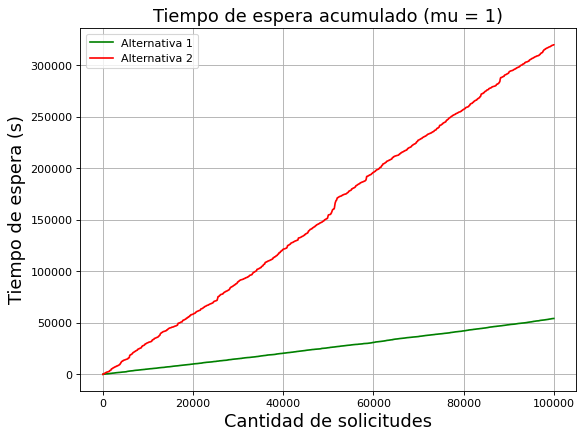

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas_alt1_mu1_sim_1)), esperas_alt1_mu1_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas_alt2_mu1_sim_1)), esperas_alt2_mu1_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 1)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()

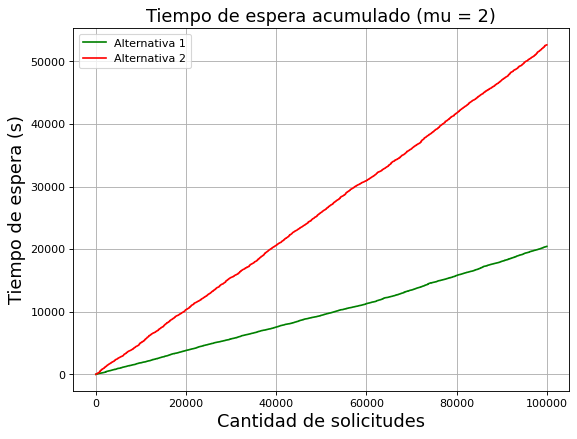

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas_alt1_mu2_sim_1)), esperas_alt1_mu2_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas_alt2_mu2_sim_1)), esperas_alt2_mu2_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 2)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()

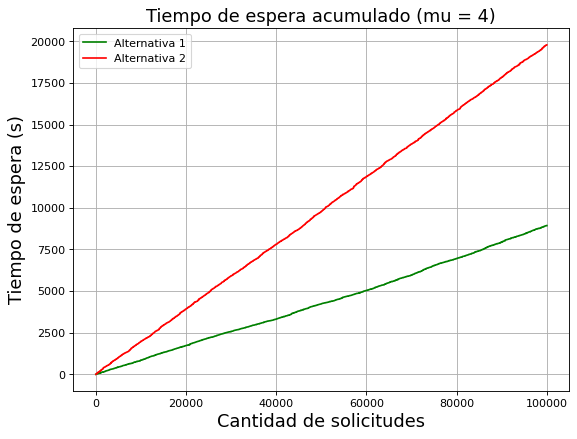

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas_alt1_mu4_sim_1)), esperas_alt1_mu4_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas_alt2_mu4_sim_1)), esperas_alt2_mu4_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 4)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()

# Ejercicio 4

In [ ]:
! pip install simpy

In [ ]:
import simpy

In [ ]:
class Database:
    def __init__(self, resource, mu):
        self.resource = resource
        self.mu = mu

In [ ]:
def requests1(env, n, mu, databaseA, databaseB, z, t, t_espera, t_demora):
    for i in range(n):
        
        zi = np.random.exponential(mu)
        z.append(zi)
        yield env.timeout(zi)
        
        env.process(query1(env, databaseA, databaseB, z, t, t_espera, t_demora))

In [ ]:
def query1(env, databaseA, databaseB, z, t, t_espera, t_demora):
    
    arrival = env.now
    t.append(arrival)
    
    if (np.random.rand() < p):
        database = databaseA
    else:
        database = databaseB
    
    with database.resource.request() as db:
        yield db

        wait = env.now - arrival
        t_espera.append(wait)

        di = np.random.exponential(database.mu)
        t_demora.append(di)
        yield env.timeout(di)

In [ ]:
def simulate_4_alt1(simulations, mu):
    t_medios_espera = []
    tasas_finalizacion = []
    fraccion_no_espera = []
    for i in range(simulations):
        z = []
        t = []
        t_espera = []
        t_demora = []
        
        # Simulacion
        env = simpy.Environment()
        databaseA = Database(simpy.Resource(env, capacity=1), mu_1a)
        databaseB = Database(simpy.Resource(env, capacity=1), mu_1b)
        env.process(requests1(env, n, mu, databaseA, databaseB, z, t, t_espera, t_demora))
        env.run()
        
        # Procesamiento de resultados
        t_medio_espera = np.mean(t_espera)
        fracc_no_espera = (len(t_espera) - np.count_nonzero(t_espera))/len(t_espera)
        tasa_llegada = 1 /np.mean(np.array(z))
        tasa_espera =  1 /np.mean(np.array(t_espera))
        tasa_demora =  1 /np.mean(np.array(t_demora))
        tasa_finalizacion = tasa_llegada + tasa_espera + tasa_demora

        t_medios_espera.append(t_medio_espera)
        tasas_finalizacion.append(tasa_finalizacion)
        fraccion_no_espera.append(fracc_no_espera)
        
    print("RESULTS")
    print("Alternativa 1 con {:d} simulaciones y mu: {:d}".format(simulations, mu))
    print("Tiempo medio de espera: {:.4f} seg".format(np.mean(t_medios_espera)))
    print("Fraccion de solicitudes que no esperaron: {:.5f}".format(np.mean(fraccion_no_espera)))
    print("Tasa de finalizacion de consultas: {:.7f} seg \n".format(np.mean(tasas_finalizacion)))
    
    return np.concatenate(([0],np.cumsum(t_espera)),axis=None)

In [ ]:
esperas4_alt1_mu1_sim_1 = simulate_4_alt1(1, mu_a)
esperas4_alt1_mu2_sim_1 = simulate_4_alt1(1, mu_b)
esperas4_alt1_mu4_sim_1 = simulate_4_alt1(1, mu_c)

RESULTS
Alternativa 1 con 1 simulaciones y mu: 1
Tiempo medio de espera: 0.5322 seg
Fraccion de solicitudes que no esperaron: 0.59809
Tasa de finalizacion de consultas: 4.1387999 seg 

RESULTS
Alternativa 1 con 1 simulaciones y mu: 2
Tiempo medio de espera: 0.2043 seg
Fraccion de solicitudes que no esperaron: 0.79580
Tasa de finalizacion de consultas: 6.6416497 seg 

RESULTS
Alternativa 1 con 1 simulaciones y mu: 4
Tiempo medio de espera: 0.0903 seg
Fraccion de solicitudes que no esperaron: 0.89858
Tasa de finalizacion de consultas: 12.5652697 seg 



In [ ]:
simulate_4_alt1(cant_simu, mu_a)
simulate_4_alt1(cant_simu, mu_b)
simulate_4_alt1(cant_simu, mu_c)

In [ ]:
def requests2(env, n, mu, database, z, t, t_espera, t_demora):
    for i in range(n):
        
        zi = np.random.exponential(mu)
        z.append(zi)
        yield env.timeout(zi)
        
        env.process(query2(env, database, z, t, t_espera, t_demora))

In [ ]:
def query2(env, database, z, t, t_espera, t_demora):
    
    arrival = env.now
    t.append(arrival)
    
    with database.resource.request() as db:
        yield db
        
        wait = env.now - arrival
        t_espera.append(wait)
        
        di = np.random.exponential(database.mu)
        t_demora.append(di)
        yield env.timeout(di)

In [ ]:
def simulate_4_alt2(simulations, mu):
    t_medios_espera = []
    tasas_finalizacion = []
    fraccion_no_espera = []
    for i in range(simulations):
        z = []
        t = []
        t_espera = []
        t_demora = []
        
        # Simulacion
        env = simpy.Environment()
        database = Database(simpy.Resource(env, capacity=1), mu_2)
        env.process(requests2(env, n, mu, database, z, t, t_espera, t_demora))
        env.run()
        
        # Procesamiento de resultados
        t_medio_espera = np.mean(t_espera)
        fracc_no_espera = (len(t_espera) - np.count_nonzero(t_espera))/len(t_espera)
        tasa_llegada = 1 /np.mean(np.array(z))
        tasa_espera =  1 /np.mean(np.array(t_espera))
        tasa_demora =  1 /np.mean(np.array(t_demora))
        tasa_finalizacion = tasa_llegada + tasa_espera + tasa_demora

        t_medios_espera.append(t_medio_espera)
        tasas_finalizacion.append(tasa_finalizacion)
        fraccion_no_espera.append(fracc_no_espera)
        
    print("RESULTS")
    print("Alternativa 2 con {:d} simulaciones y mu: {:d}".format(simulations, mu))
    print("Tiempo medio de espera: {:.4f} seg".format(np.mean(t_medios_espera)))
    print("Fraccion de solicitudes que no esperaron: {:.5f}".format(np.mean(fraccion_no_espera)))
    print("Tasa de finalizacion de consultas: {:.7f} seg \n".format(np.mean(tasas_finalizacion)))
    
    return np.concatenate(([0],np.cumsum(t_espera)),axis=None)

In [ ]:
esperas4_alt2_mu1_sim_1 = simulate_4_alt2(1, mu_a)
esperas4_alt2_mu2_sim_1 = simulate_4_alt2(1, mu_b)
esperas4_alt2_mu4_sim_1 = simulate_4_alt2(1, mu_c)

In [ ]:
simulate_4_alt2(cant_simu, mu_a)
simulate_4_alt2(cant_simu, mu_b)
simulate_4_alt2(cant_simu, mu_c)

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas4_alt1_mu1_sim_1)), esperas4_alt1_mu1_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas4_alt2_mu1_sim_1)), esperas4_alt2_mu1_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 1)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas4_alt1_mu2_sim_1)), esperas4_alt1_mu2_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas4_alt2_mu2_sim_1)), esperas4_alt2_mu2_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 2)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas4_alt1_mu4_sim_1)), esperas4_alt1_mu4_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas4_alt2_mu4_sim_1)), esperas4_alt2_mu4_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 4)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()